In [ ]:
!pip install mplsoccer

# PyTorch
#!pip install torch torchvision
#!pip install opencv-contrib-python
#!pip install scikit-learn

import cv2 #opencv itself
import numpy as np
%matplotlib inline
from matplotlib import patches, pyplot as plt # this lets you draw inline pictures in the notebooks
from google.colab.patches import cv2_imshow
from mplsoccer import Pitch
import math
import os
import re

"""
# import the necessary packages for the CNN
from sklearn.metrics import classification_report
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
from torch.optim import Adam
from torch import nn
from torch.nn import Module, Conv2d, Linear, MaxPool2d, ReLU, LogSoftmax
import argparse
import torch
import time
"""

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.4 MB/s eta 0:00:00


'\n# import the necessary packages for the CNN\nfrom sklearn.metrics import classification_report\nfrom torch.utils.data import random_split, DataLoader\nfrom torchvision.transforms import ToTensor\nfrom torchvision.datasets import KMNIST\nfrom torch.optim import Adam\nfrom torch import nn\nfrom torch.nn import Module, Conv2d, Linear, MaxPool2d, ReLU, LogSoftmax\nimport argparse\nimport torch\nimport time\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
from google.colab import files

# Reading the images
path_to_images = "/content/drive/MyDrive/Master 1/Projet TER/Images/Metrica Sports/Game 1/Half Pitch - xT/"
image_sequence = {int(re.split("\_|\.", filename)[2]):
                  cv2.imread(os.path.join(path_to_images, filename), cv2.IMREAD_COLOR)
                  for filename in os.listdir(path_to_images)
                  if os.path.isfile(os.path.join(path_to_images, filename))}

# Put the images in numerical order according to their title
frames = list(image_sequence.keys())
frames.sort()
image_sequence = {i: image_sequence[i] for i in frames}
print(image_sequence.keys())

frame_count = len(frames)

# Print the first image
first_frame = next(iter(image_sequence))  # Get the first frame number
first_image = image_sequence[first_frame]  # Get the corresponding image
print(first_image)

first_frame = frames[0]


dict_keys([77, 78, 79, 81, 82, 83, 85, 86, 87, 89, 90, 91, 93, 94, 96, 191, 192, 194, 196, 198, 200, 202, 204, 205, 207, 209, 211, 213, 215, 217, 279, 280, 282, 284, 285, 287, 289, 291, 292, 294, 296, 297, 299, 301, 303, 536, 537, 538, 540, 541, 543, 544, 546, 547, 548, 550, 551, 553, 554, 556, 976, 978, 980, 983, 985, 988, 990, 993, 995, 997, 1000, 1002, 1005, 1007, 1010, 2143, 2145, 2148, 2151, 2154, 2157, 2160, 2163, 2166, 2169, 2172, 2175, 2178, 2181, 2184, 2263, 2264, 2266, 2268, 2270, 2272, 2274, 2276, 2277, 2279, 2281, 2283, 2285, 2287, 2289, 7203, 7207, 7212, 7216, 7221, 7225, 7230, 7234, 7239, 7243, 7248, 7252, 7257, 7261, 7266, 7267, 7269, 7271, 7272, 7274, 7276, 7278, 7279, 7281, 7283, 7284, 7286, 7288, 7290, 7334, 7337, 7341, 7345, 7349, 7352, 7356, 7360, 7364, 7368, 7371, 7375, 7379, 7383, 7387, 7404, 7405, 7407, 7408, 7410, 7412, 7413, 7415, 7417, 7418, 7420, 7422, 7423, 7425, 7427, 7519, 7521, 7524, 7526, 7529, 7532, 7534, 7537, 7540, 7542, 7545, 7548, 7550, 7553, 7556, 

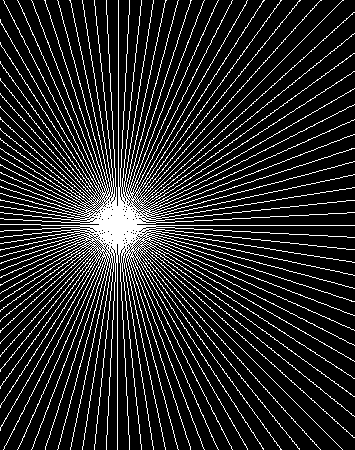

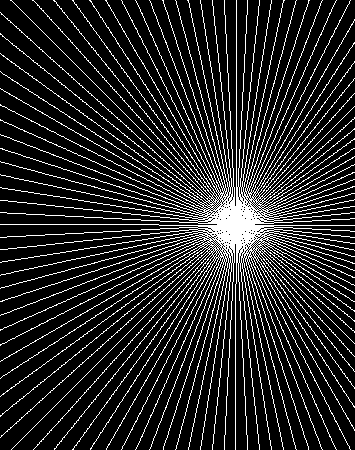

In [ ]:

def get_radial_lines(center: tuple[int,int],
                     image_shape: list[int,int]|list[int,int,int],
                     max_radius: int
                     ) -> list[list[tuple[int,int]]]:
    """
    Generate the coordinates of all radial lines starting from the center
    of the image to the edges of the image.

    Args:
        center: tuple (x, y) of the coordinates of the center of the image.
        image_shape: tuple (height, width) defining the size of the image.
    Returns:
        A list of lists, each list containing the (x, y) coordinates of the pixels
        forming a radial line starting from the center of the image.
    """
    height, width = image_shape

    lines = []
    angle_shift = 90 # Angle shift to start on the horizontal axis
    angle_step = 3 # Defining a step for the angle to avoid aliasing effect

    for angle in range(angle_shift, 360 + angle_shift, angle_step):
        line = []
        for r in range(max_radius):
            y = int(center[0] + r * np.cos(np.radians(angle)))
            x = int(center[1] + r * np.sin(np.radians(angle)))
            if 0 <= x < width and 0 <= y < height:
                line.append((y, x))
            else:
                break
        lines.append(line)
    return lines


# Define the image dimensions
image_height, image_width = image_sequence[first_frame].shape[:2]

# Define the central coordinates of the image (y,x)
center_1 = (image_height // 2, image_width // 3)
center_2 = (image_height // 2, (2*image_width)// 3)

# Calculate the maximal length of a line
max_radius_1 = math.ceil(cv2.norm(center_1, (0,image_width)))
max_radius_2 = math.ceil(cv2.norm(center_2, (0,0)))

# Generate the coordinates of each radial line
radial_lines_1 = get_radial_lines(center_1, (image_height, image_width), max_radius_1)
radial_lines_2 = get_radial_lines(center_2, (image_height, image_width), max_radius_2)

"""
# Print the coordinates of each radial line
for i, line in enumerate(radial_lines):
    print(f"Ligne radiale {i + 1}: {line}")
"""

# Generate a test image representing the lines
image_test_1 = np.zeros(shape=(image_height, image_width))
image_test_2 = np.zeros(shape=(image_height, image_width))

for line in radial_lines_1:
  for point in line:
    image_test_1[point] = 255

for line in radial_lines_2:
  for point in line:
    image_test_2[point] = 255

cv2_imshow(image_test_1)
cv2_imshow(image_test_2)




In [ ]:
# Definition of the team colors
AWAY_COLOR = np.array([30, 144, 255])
HOME_COLOR = np.array([255, 165, 0])
AWAY_RGB = (AWAY_COLOR[0]/256, AWAY_COLOR[1]/256, AWAY_COLOR[2]/256)
HOME_RGB = (HOME_COLOR[0]/256, HOME_COLOR[1]/256, HOME_COLOR[2]/256)

# Definition of the RLM normalization method ("mode" or "area")
NORMALIZATION_METHOD = "mode"


def get_rlm_for_both_teams(image: np.ndarray,
                           radial_lines: list[list[tuple[int,int]]]
                           ) -> tuple[list[int],list[int]]:
    """
    Calculate the RLM histograms for each team from the provided radial lines.

    Args:
        image: np.ndarray [y, x[, color channel]] representing an image.
        radial lines: list containing the vectors of (x, y) points of the image
        corresponding to the coordinates of each line.
    Returns:
        Two lists of integers, each corresponding to the RLM histogram of a team.
        The first histogram represents the away team, while the second represents
        the home team.
    """

    away_team_rlm = []
    home_team_rlm = []

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for line in radial_lines:
        away_team_sum = 0
        home_team_sum = 0

        for pixel in line:
            pixel_color = image_rgb[pixel[0], pixel[1]]

            if np.array_equal(pixel_color, AWAY_COLOR):
                away_team_sum += 1
            elif np.array_equal(pixel_color, HOME_COLOR):
                home_team_sum += 1

        away_team_rlm.append(away_team_sum)
        home_team_rlm.append(home_team_sum)

    return away_team_rlm, home_team_rlm


def normalize_rlm(rlm: list[int], method: str) -> list[int]:
    """
    Normalize the provided RLM according to the specified method.

    Args:
        rlm: list of integers representing the RLM histogram of an object.
        method: string corresponding to the desired normalization method.
        It can take two values: "area" or "mode".
        "area" is based on the total area of the object.
        "mode" is based on the mode of the histogram, i.e., the most frequent value.
    Returns:
        A list of integers corresponding to the normalized RLM histogram.
    """
    if method == "area":
        object_area = sum(rlm)
        return [value / object_area for value in rlm]
    elif method == "mode":
        mode_value = max(rlm)
        return [value / mode_value for value in rlm]



In [ ]:
def plot_rlm(rlm: list[int], line_color_rgb: np.ndarray, title: str):
    """
    Plot l'histogramme RLM passé en paramètre.
    """
    plt.plot(range(0,360,3), rlm, color=line_color_rgb)
    plt.title(title)
    plt.show()

# Test on the beginning 15 frames
first_15_frames = {key: image_sequence[key] for key in list(image_sequence.keys())[:15]}

away_rlm_matrix_1 = []
home_rlm_matrix_1 = []
away_rlm_matrix_2 = []
home_rlm_matrix_2 = []

# Calculation, then display of the RLM histograms for both teams for each image
for frame in first_15_frames:
    image = image_sequence[frame]

    print(image)
    away_team_rlm_1, home_team_rlm_1 = get_rlm_for_both_teams(image, radial_lines_1)
    away_team_rlm_2, home_team_rlm_2 = get_rlm_for_both_teams(image, radial_lines_2)

    # RLM normalization in respect to the specified method in the according constant
    normalized_away_rlm_1 = normalize_rlm(away_team_rlm_1, NORMALIZATION_METHOD)
    normalized_home_rlm_1 = normalize_rlm(home_team_rlm_1, NORMALIZATION_METHOD)
    normalized_away_rlm_2 = normalize_rlm(away_team_rlm_2, NORMALIZATION_METHOD)
    normalized_home_rlm_2 = normalize_rlm(home_team_rlm_2, NORMALIZATION_METHOD)

    away_rlm_matrix_1.append(normalized_away_rlm_1)
    home_rlm_matrix_1.append(normalized_home_rlm_1)
    away_rlm_matrix_2.append(normalized_away_rlm_2)
    home_rlm_matrix_2.append(normalized_home_rlm_2)

    """
    # Visualisation of the histograms
    plot_rlm(normalized_away_rlm_1, AWAY_RGB,
             f"Frame {frame}: Normalized away team RLM histogram point 1")
    plot_rlm(normalized_home_rlm_1, HOME_RGB,
             f"Frame {frame}: Normalized home team RLM histogram point 1")
    plot_rlm(normalized_away_rlm_2, AWAY_RGB,
            f"Frame {frame}: Normalized away team RLM histogram point 2")
    plot_rlm(normalized_home_rlm_2, HOME_RGB,
             f"Frame {frame}: Normalized home team RLM histogram point 2")
    """


In [ ]:
print(home_team_rlm_1)
print(frame)

[217, 218, 217, 220, 195, 152, 145, 162, 180, 199, 218, 228, 227, 217, 205, 198, 192, 189, 194, 198, 110, 53, 37, 31, 31, 32, 50, 68, 83, 95, 105, 114, 115, 115, 73, 38, 41, 63, 82, 98, 111, 125, 127, 117, 108, 101, 95, 90, 84, 71, 64, 62, 62, 60, 59, 60, 59, 58, 59, 59, 59, 60, 60, 60, 62, 63, 64, 66, 67, 69, 72, 74, 78, 83, 87, 92, 85, 73, 65, 58, 52, 48, 44, 41, 38, 37, 35, 34, 35, 37, 39, 46, 52, 60, 75, 95, 132, 211, 227, 233, 237, 245, 254, 264, 275, 292, 292, 280, 270, 259, 253, 245, 239, 232, 216, 218, 215, 209, 218, 217]
7266


In [ ]:
# Determine the starting points for subsequences (every 15 keys)
with open('/content/drive/MyDrive/Master 1/Projet TER/Data/sequences.json', 'r') as file:
    sequences = json.load(file)

start_frames = [sequence[0] for sequence in sequences]

# Create a list of subsequences
image_subsequence_list = []

# Iterate over the starting points
for start_frame in start_frames:
    # Extract 15 consecutive key-value pairs starting from the current start_frame
    subsequence = {key: image_sequence[key] for key in list(image_sequence.keys())[list(image_sequence.keys()).index(start_frame):list(image_sequence.keys()).index(start_frame) + 15]}

    # Append the subsequence to the list
    image_subsequence_list.append(subsequence)

complete_away_rlm_matrix_1 = []
complete_home_rlm_matrix_1 = []
complete_away_rlm_matrix_2 = []
complete_home_rlm_matrix_2 = []

# Calculation of the RLM histograms for both teams for each image
for image_subsequence in image_subsequence_list:

    sequence_away_rlm_matrix_1 = []
    sequence_home_rlm_matrix_1 = []
    sequence_away_rlm_matrix_2 = []
    sequence_home_rlm_matrix_2 = []

    for frame in image_subsequence:
        image = image_sequence[frame]

        away_team_rlm_1, home_team_rlm_1 = get_rlm_for_both_teams(image, radial_lines_1)
        away_team_rlm_2, home_team_rlm_2 = get_rlm_for_both_teams(image, radial_lines_2)

        # RLM normalization in respect to the specified method in the according constant
        normalized_away_rlm_1 = normalize_rlm(away_team_rlm_1, NORMALIZATION_METHOD)
        normalized_home_rlm_1 = normalize_rlm(home_team_rlm_1, NORMALIZATION_METHOD)
        normalized_away_rlm_2 = normalize_rlm(away_team_rlm_2, NORMALIZATION_METHOD)
        normalized_home_rlm_2 = normalize_rlm(home_team_rlm_2, NORMALIZATION_METHOD)

        sequence_away_rlm_matrix_1.append(normalized_away_rlm_1)
        sequence_home_rlm_matrix_1.append(normalized_home_rlm_1)
        sequence_away_rlm_matrix_2.append(normalized_away_rlm_2)
        sequence_home_rlm_matrix_2.append(normalized_home_rlm_2)

    complete_away_rlm_matrix_1.append(sequence_away_rlm_matrix_1)
    complete_home_rlm_matrix_1.append(sequence_home_rlm_matrix_1)
    complete_away_rlm_matrix_2.append(sequence_away_rlm_matrix_2)
    complete_home_rlm_matrix_2.append(sequence_home_rlm_matrix_2)

In [ ]:
# Only for visualisation purposes
def plot_rlm_image(away_rlm_matrix_1, home_rlm_matrix_1,
                   away_rlm_matrix_2, home_rlm_matrix_2):

    # Plot the away matrix at P1

    plt.figure(figsize=(10, 5))
    plt.imshow(away_rlm_matrix_1, cmap='YlGn', aspect='auto')
    plt.colorbar(label='Intensity')
    plt.title('Away Team RLM Matrix at Point 1')
    plt.xlabel(r'angle ($\theta$)')
    plt.ylabel('frame')
    plt.show()

    # Plot the home matrix at P1

    plt.figure(figsize=(10, 5))
    plt.imshow(home_rlm_matrix_1, cmap='YlGn', aspect='auto')
    plt.colorbar(label='Intensity')
    plt.title('Home Team RLM Matrix at Point 1')
    plt.xlabel(r'angle ($\theta$)')
    plt.ylabel('frame')
    plt.show()

    # Plot the away matrix at P2

    plt.figure(figsize=(10, 5))
    plt.imshow(away_rlm_matrix_2, cmap='YlGn', aspect='auto')
    plt.colorbar(label='Intensity')
    plt.title('Away Team RLM Matrix at Point 2')
    plt.xlabel(r'angle ($\theta$)')
    plt.ylabel('frame')
    plt.show()

    # Plot the home matrix at P2

    plt.figure(figsize=(10, 5))
    plt.imshow(home_rlm_matrix_2, cmap='YlGn', aspect='auto')
    plt.colorbar(label='Intensity')
    plt.title('Home Team RLM Matrix at Point 2')
    plt.xlabel(r'angle ($\theta$)')
    plt.ylabel('frame')
    plt.show()




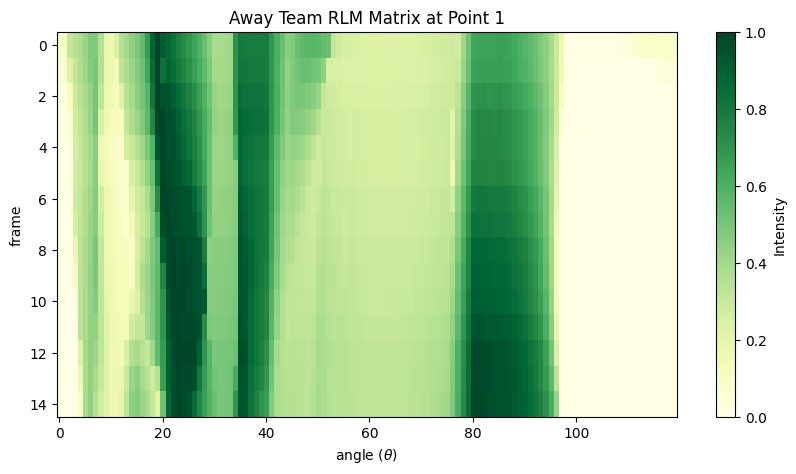

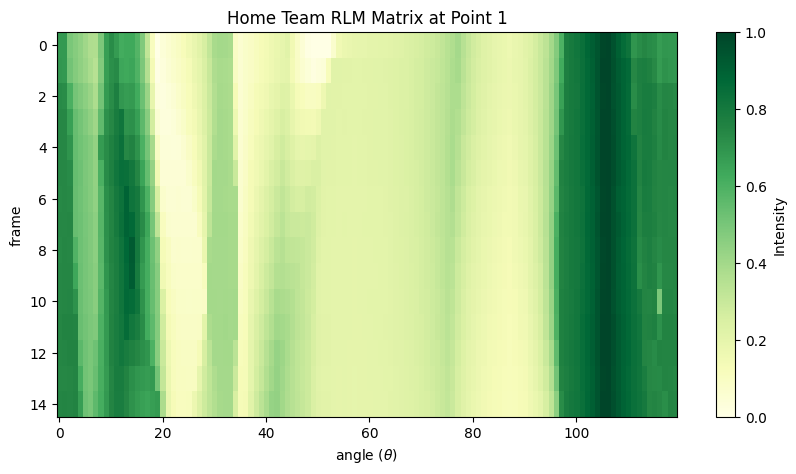

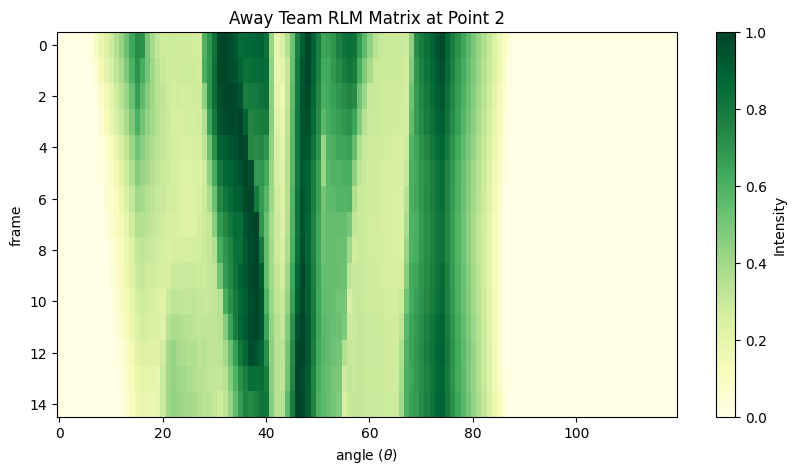

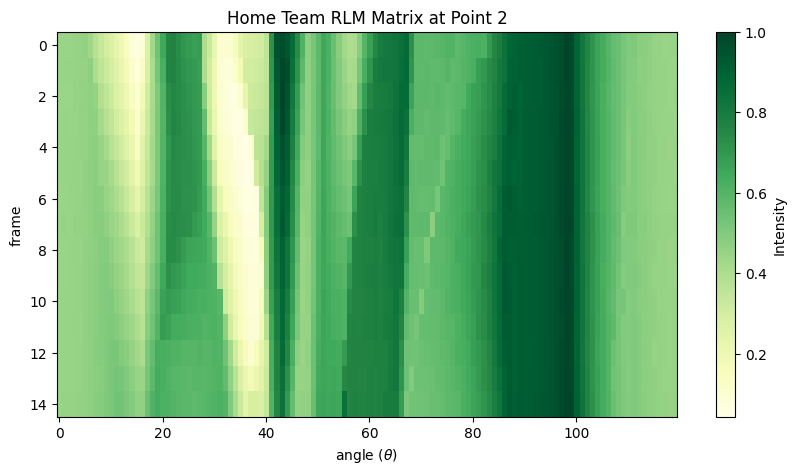

In [ ]:
plot_rlm_image(complete_away_rlm_matrix_1[0], complete_home_rlm_matrix_1[0], complete_away_rlm_matrix_2[0], complete_home_rlm_matrix_2[0])

In [ ]:
# Convert into JSON
# File name is mydata.json
with open("RLMs_per_sequence_away_1.json", "w") as final:
    json.dump(complete_away_rlm_matrix_1, final)

with open("RLMs_per_sequence_away_2.json", "w") as final:
    json.dump(complete_away_rlm_matrix_2, final)

with open("RLMs_per_sequence_home_1.json", "w") as final:
    json.dump(complete_home_rlm_matrix_1, final)

with open("RLMs_per_sequence_home_2.json", "w") as final:
    json.dump(complete_home_rlm_matrix_2, final)

# Download the file
files.download('RLMs_per_sequence_away_1.json')
files.download('RLMs_per_sequence_away_2.json')
files.download('RLMs_per_sequence_home_1.json')
files.download('RLMs_per_sequence_home_2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>